# Наискорейший спуск на сфере
## Постановка задачи
$$\underset{\| x \|^2 - 1 = 0}{min} f(x) = x^T A x$$


In [13]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## В следующей ячейке в первой строке задается матрица квадратичной формы.
### Далее заранее обсчитываются квадрат и куб этой матрицы, задается начальное приближение, потом сразу же проецируется на сферу.

In [20]:
A = np.array([[1., 1., 1.], [1., -100., 1.], [1.,1.,8.]])

In [21]:
print A


[[   1.    1.    1.]
 [   1. -100.    1.]
 [   1.    1.    8.]]


## В следующей ячейке задается функция, которая возвращает значение второй производной целевой функции при выборе шага (см pdf)
$$F'' = \frac{\gamma^3 (-2a_2\widehat{a_2} )+ \gamma^2 (-3a_2\widehat{a_1}) + \gamma(2\widehat{a_2}a_0 - 4a_2\widehat{a_0} + 2a_1\widehat{a_1}) + \widehat{a_1}a_0 + 4a_1\widehat{a_0}}{(\gamma^2 a_2 - 2\gamma a_1 + a_0)^3},$$


$$a_i = {x^k}^T A^i x^k, i = 0,1,2,3$$


In [22]:
def F2(gamma, a2, a2t, a1t, a0, a0t, a1):
    return (gamma**3 * (-2.*a2*a2t) + gamma**2 * (-3. * a2 * a1t) + gamma * (2.*a2t * a0 - 4. * a2 * a0t + 2. * a1 * a1t) + a1t * a0 + 4. * a1 * a0t) / ((a2 * gamma**2 - 2. * gamma * a1 + a0)**3)

# Далее идет сам метод
Шаги вычисляются в соответствии с написанным в статье, с подстраховской на тот случай, если коэффициент при $\gamma^2$ обратится в ноль (помечено "!")

In [23]:
def method(A, x0, print_rate):
    x = x0 / np.linalg.norm(x0)
    A_sq = A.dot(A)
    A_th = A.dot(A_sq)
    notenough = True
    prevx = x
    i = 0
    while(notenough):
        a0 = x.T.dot(x)
        a1 = x.T.dot(np.dot(A,x))
        a2 = x.T.dot(np.dot(A_sq,x))
        a3 = x.T.dot(np.dot(A_th,x))
        a2t = a2**2 - a3 * a1
        a1t = a3 * a0 - a2 * a1
        a0t = a1**2 - a0 * a2
        """
        print a0
        print a1
        print a2
        print a3
        print '_____'
        print a2t
        print a1t
        print a0t
        """
        if (a2**2 - a3 * a1) != 0:
            if i % print_rate == 0:
                print 'case quadr'
            gamma1 = ((a2 * a1 - a3 * a0) + np.sqrt((a2 * a1 - a3 * a0)**2 - 4. * (a2**2 - a3 * a1)*(a1**2 - a0 * a2)))/2. / (a2**2 - a3 * a1)
            gamma2 = ((a2 * a1 - a3 * a0) - np.sqrt((a2 * a1 - a3 * a0)**2 - 4. * (a2**2 - a3 * a1)*(a1**2 - a0 * a2)))/2. / (a2**2 - a3 * a1)
            gamma_list = []
            print 'gamma1 = ', gamma1
            print 'gamma2 = ', gamma2
            print 'F2(gamma1) = ', F2(gamma1, a2, a2t, a1t, a0, a0t, a1)
            print 'F2(gamma2) = ', F2(gamma2, a2, a2t, a1t, a0, a0t, a1)
            for gamma in [gamma1, gamma2]:
                if gamma >=0 and F2(gamma, a2, a2t, a1t, a0, a0t, a1) > 0:
                    gamma_list.append(gamma)
            #print 'gamma_list len = ', len(gamma_list)
            if len(gamma_list) > 0:
                final_gamma = gamma_list[np.random.randint(len(gamma_list))]
            else:
                print 'there is no suitable gamma. i quit'
                return x
                """
                final_gamma = np.random.rand(1) * 7. / 100.
                if i % print_rate == 0:
                    print 'there is no suitable gamma. choosing random from 0 to 0.1'
                """
            if i % print_rate == 0:
                print 'quadr gamma = ', final_gamma 
            x = (x - final_gamma * np.dot(A, x))/ np.linalg.norm(x - final_gamma * np.dot(A, x))
        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        if  (a2**2 - a3 * a1) == 0 and (a3 * a0 - a2 * a1) != 0:
            if i % print_rate == 0:
                print 'case linear'
            gamma = (a1**2 - a0 * a2)/(a3 * a0 - a2 * a1)
            if gamma > 0 and F2(gamma, a2, a2t, a1t, a0, a0t, a1) > 0:
                    x = (x - gamma * np.dot(A, x))/ np.linalg.norm(x - gamma * np.dot(A, x))
            else:
                if i % print_rate == 0:
                    print 'you got no suitable gamma'
        if (a3 * a0 - a2 * a1) == 0 and (a2**2 - a3 * a1) == 0:
            if i % print_rate == 0:
                print 'you got rekt'
                print 'iternum = ', i
                print '(a3 * a0 - a2 * a1)', (a3 * a0 - a2 * a1)
                print '(a2**2 - a3 * a1)', (a2**2 - a3 * a1)
                return x
        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!    
        if i % print_rate == 0:
            print 'iter_num = ', i
            print 'CURRENT X = ', x
            print 'NORM = ', np.linalg.norm(x)
        if (np.linalg.norm(x - prevx) < 1e-6):
            notenough = False
        else:
            prevx = x
        xs.append(x)
        fs.append(x.dot(np.dot(A,x)))
        i += 1
    return x

# Начальная точка (0, 1, 0)

In [24]:
x0 = np.array([0., 1., 0.])
xs = []
fs = []
x = method(A, x0,3)

case quadr
gamma1 =  0.181193757139
gamma2 =  -0.00999810496511
F2(gamma1) =  0.00157902002955
F2(gamma2) =  -5279000588.99
quadr gamma =  0.181193757139
iter_num =  0
CURRENT X =  [-0.00947612  0.9999102  -0.00947612]
NORM =  1.0
gamma1 =  0.285712542332
gamma2 =  -0.00999810284777
F2(gamma1) =  2.97611646272e-07
F2(gamma2) =  -4.70893120828e+12
gamma1 =  0.181191888454
gamma2 =  -0.00999810336113
F2(gamma1) =  1.9845585847e-09
F2(gamma2) =  -4.20035141376e+15
case quadr
gamma1 =  0.289540832239
gamma2 =  -0.00999981661385
F2(gamma1) =  3.5457909328e-13
F2(gamma2) =  -330904225.948
quadr gamma =  0.289540832239
iter_num =  3
CURRENT X =  [-0.00980749  0.99990989 -0.00916599]
NORM =  1.0


In [25]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -100.018975217
x* =  [-0.00980749  0.99990989 -0.00916599]
norm check:  1.0


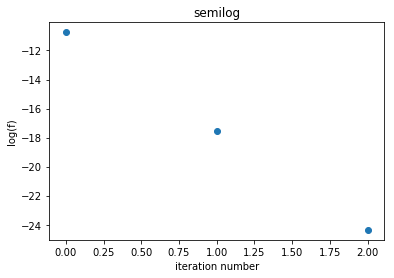

In [26]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(np.hstack((fminfstar[:np.argmin(fs)], fminfstar[np.argmin(fs) + 1:])))

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

Начальная точка
$$x_0 = \frac{(-1, 1, 3)^T}{\sqrt{11}}$$

In [27]:
x0 = np.array([-1., 1., 3.])
xs = []
fs = []
x = method(A, x0, 1)

case quadr
gamma1 =  0.145361384481
gamma2 =  -0.0100758954114
F2(gamma1) =  214.269946299
F2(gamma2) =  -90045.6963319
quadr gamma =  0.145361384481
iter_num =  0
CURRENT X =  [-0.09373489  0.99508613 -0.03189627]
NORM =  1.0
case quadr
gamma1 =  0.467502896964
gamma2 =  -0.00999815730842
F2(gamma1) =  0.00155971754532
F2(gamma2) =  -128705417.861
quadr gamma =  0.467502896964
iter_num =  1
CURRENT X =  [-0.01051338  0.99992009 -0.00701977]
NORM =  1.0
case quadr
gamma1 =  0.145349879689
gamma2 =  -0.00999810287642
F2(gamma1) =  0.000106761189823
F2(gamma2) =  -183785313652.0
quadr gamma =  0.145349879689
iter_num =  2
CURRENT X =  [-0.00986653  0.99990917 -0.00918201]
NORM =  1.0
case quadr
gamma1 =  0.467505391855
gamma2 =  -0.00999810275267
F2(gamma1) =  7.64916820983e-10
F2(gamma2) =  -2.62436498533e+14
quadr gamma =  0.467505391855
iter_num =  3
CURRENT X =  [-0.009808   0.9999099 -0.0091645]
NORM =  1.0
case quadr
gamma1 =  0.145383082771
gamma2 =  -0.00999802965983
F2(gamma1) =

In [28]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -100.018975217
x* =  [-0.00980752  0.99990989 -0.00916601]
norm check:  1.0


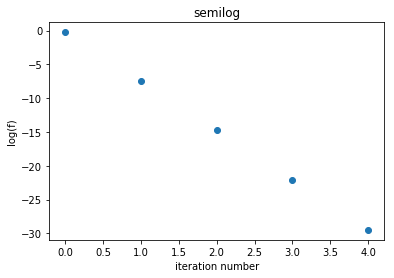

In [29]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()

Начальная точка
$$x_0 = \frac{(-1, 5, 3)^T}{\sqrt{35}}$$

In [30]:
x0 = np.array([-1., -5., 3.])
x0 = x0 / np.linalg.norm(x0)
xs = []
fs = []
x = method(A, x0, 2)

case quadr
gamma1 =  0.148083618821
gamma2 =  -0.010001239472
F2(gamma1) =  7.58160952141
F2(gamma2) =  -2406225.62723
quadr gamma =  0.148083618821
iter_num =  0
CURRENT X =  [-0.0070046  -0.99996658  0.00421593]
NORM =  1.0
gamma1 =  0.441304287551
gamma2 =  -0.00999810520303
F2(gamma1) =  7.90172068073e-05
F2(gamma2) =  -3191768290.96
case quadr
gamma1 =  0.148083100693
gamma2 =  -0.00999810283626
F2(gamma1) =  4.31205427862e-06
F2(gamma2) =  -4.23359312322e+12
quadr gamma =  0.148083100693
iter_num =  2
CURRENT X =  [ 0.00979483 -0.99991005  0.00916227]
NORM =  1.0
gamma1 =  0.441295943653
gamma2 =  -0.00999809821864
F2(gamma1) =  4.49157765292e-11
F2(gamma2) =  -5.60234830875e+15
case quadr
gamma1 =  0.142007497347
gamma2 =  -0.00999922528855
F2(gamma1) =  2.88286207472e-12
F2(gamma2) =  -969580616.724
quadr gamma =  0.142007497347
iter_num =  4
CURRENT X =  [ 0.00980749 -0.99990989  0.009166  ]
NORM =  1.0


In [31]:
print 'f* = ', x.dot(np.dot(A,x))
print 'x* = ', x
print 'norm check: ', np.linalg.norm(x)

f* =  -100.018975217
x* =  [ 0.00980749 -0.99990989  0.009166  ]
norm check:  1.0


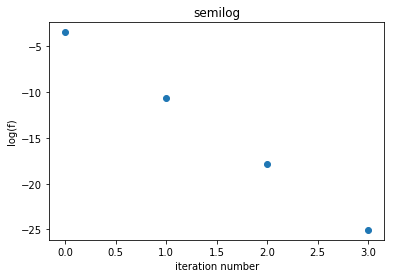

In [32]:
fstar = fs[np.argmin(fs)]
fminfstar = fs - np.ones(len(fs)) * fstar
logf = np.log(fminfstar[:len(fs) - 1])

plt.figure()
plt.scatter(range(len(logf)), logf)
plt.xlabel('iteration number')
plt.ylabel('log(f)')
plt.title('semilog')
plt.show()